In [95]:
import warnings
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import imblearn
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve,auc,precision_recall_curve 
from sklearn.preprocessing import StandardScaler

# Data description

In [2]:
data = pd.read_csv('c_bankruptcy_data.csv')
print(data.shape)
data.head()

(6819, 96)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [3]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [4]:
data[' Net Income Flag']

0       1
1       1
2       1
3       1
4       1
       ..
6814    1
6815    1
6816    1
6817    1
6818    1
Name:  Net Income Flag, Length: 6819, dtype: int64

In [5]:
#Removing the column that has only 1 as value
data = data.drop(' Net Income Flag', axis=1) # ! Think about trimming the column names
data.shape

(6819, 95)

### Attribute Information
Y = Output feature, X = Input features

Y - Bankrupt?: Class label  
X1 - ROA(C) before interest and depreciation before interest: Return On Total Assets(C)  
X2 - ROA(A) before interest and % after tax: Return On Total Assets(A)  
X3 - ROA(B) before interest and depreciation after tax: Return On Total Assets(B)  
X4 - Operating Gross Margin: Gross Profit/Net Sales  
X5 - Realized Sales Gross Margin: Realized Gross Profit/Net Sales  
X6 - Operating Profit Rate: Operating Income/Net Sales  
X7 - Pre-tax net Interest Rate: Pre-Tax Income/Net Sales  
X8 - After-tax net Interest Rate: Net Income/Net Sales  
X9 - Non-industry income and expenditure/revenue: Net Non-operating Income Ratio  
X10 - Continuous interest rate (after tax): Net Income-Exclude Disposal Gain or Loss/Net Sales  
X11 - Operating Expense Rate: Operating Expenses/Net Sales  
X12 - Research and development expense rate: (Research and Development Expenses)/Net Sales  
X13 - Cash flow rate: Cash Flow from Operating/Current Liabilities  
X14 - Interest-bearing debt interest rate: Interest-bearing Debt/Equity  
X15 - Tax rate (A): Effective Tax Rate  
X16 - Net Value Per Share (B): Book Value Per Share(B)  
X17 - Net Value Per Share (A): Book Value Per Share(A)  
X18 - Net Value Per Share (C): Book Value Per Share(C)  
X19 - Persistent EPS in the Last Four Seasons: EPS-Net Income  
X20 - Cash Flow Per Share  
X21 - Revenue Per Share (Yuan ¥): Sales Per Share  
X22 - Operating Profit Per Share (Yuan ¥): Operating Income Per Share  
X23 - Per Share Net profit before tax (Yuan ¥): Pretax Income Per Share  
X24 - Realized Sales Gross Profit Growth Rate  
X25 - Operating Profit Growth Rate: Operating Income Growth  
X26 - After-tax Net Profit Growth Rate: Net Income Growth  
X27 - Regular Net Profit Growth Rate: Continuing Operating Income after Tax Growth  
X28 - Continuous Net Profit Growth Rate: Net Income-Excluding Disposal Gain or Loss Growth  
X29 - Total Asset Growth Rate: Total Asset Growth  
X30 - Net Value Growth Rate: Total Equity Growth  
X31 - Total Asset Return Growth Rate Ratio: Return on Total Asset Growth  
X32 - Cash Reinvestment %: Cash Reinvestment Ratio  
X33 - Current Ratio  
X34 - Quick Ratio: Acid Test  
X35 - Interest Expense Ratio: Interest Expenses/Total Revenue  
X36 - Total debt/Total net worth: Total Liability/Equity Ratio  
X37 - Debt ratio %: Liability/Total Assets  
X38 - Net worth/Assets: Equity/Total Assets  
X39 - Long-term fund suitability ratio (A): (Long-term Liability+Equity)/Fixed Assets  
X40 - Borrowing dependency: Cost of Interest-bearing Debt  
X41 - Contingent liabilities/Net worth: Contingent Liability/Equity  
X42 - Operating profit/Paid-in capital: Operating Income/Capital  
X43 - Net profit before tax/Paid-in capital: Pretax Income/Capital  
X44 - Inventory and accounts receivable/Net value: (Inventory+Accounts Receivables)/Equity  
X45 - Total Asset Turnover  
X46 - Accounts Receivable Turnover  
X47 - Average Collection Days: Days Receivable Outstanding  
X48 - Inventory Turnover Rate (times)  
X49 - Fixed Assets Turnover Frequency  
X50 - Net Worth Turnover Rate (times): Equity Turnover  
X51 - Revenue per person: Sales Per Employee  
X52 - Operating profit per person: Operation Income Per Employee  
X53 - Allocation rate per person: Fixed Assets Per Employee  
X54 - Working Capital to Total Assets  
X55 - Quick Assets/Total Assets  
X56 - Current Assets/Total Assets  
X57 - Cash/Total Assets  
X58 - Quick Assets/Current Liability  
X59 - Cash/Current Liability  
X60 - Current Liability to Assets  
X61 - Operating Funds to Liability  
X62 - Inventory/Working Capital  
X63 - Inventory/Current Liability  
X64 - Current Liabilities/Liability  
X65 - Working Capital/Equity  
X66 - Current Liabilities/Equity  
X67 - Long-term Liability to Current Assets  
X68 - Retained Earnings to Total Assets  
X69 - Total income/Total expense  
X70 - Total expense/Assets  
X71 - Current Asset Turnover Rate: Current Assets to Sales  
X72 - Quick Asset Turnover Rate: Quick Assets to Sales  
X73 - Working capitcal Turnover Rate: Working Capital to Sales  
X74 - Cash Turnover Rate: Cash to Sales  
X75 - Cash Flow to Sales  
X76 - Fixed Assets to Assets  
X77 - Current Liability to Liability  
X78 - Current Liability to Equity  
X79 - Equity to Long-term Liability  
X80 - Cash Flow to Total Assets  
X81 - Cash Flow to Liability  
X82 - CFO to Assets  
X83 - Cash Flow to Equity  
X84 - Current Liability to Current Assets  
X85 - Liability-Assets Flag: 1 if Total Liability exceeds Total Assets, 0 otherwise  
X86 - Net Income to Total Assets  
X87 - Total assets to GNP price  
X88 - No-credit Interval  
X89 - Gross Profit to Sales  
X90 - Net Income to Stockholder's Equity  
X91 - Liability to Equity  
X92 - Degree of Financial Leverage (DFL)  
X93 - Interest Coverage Ratio (Interest expense to EBIT)  
X94 - Net Income Flag: 1 if Net Income is Negative for the last two years, 0 otherwise  
X95 - Equity to Liability  

## Data Imbalance

0    6599
1     220
Name: Bankrupt?, dtype: int64


Text(0.5, 1.0, 'Bankrupt Class Distributions')

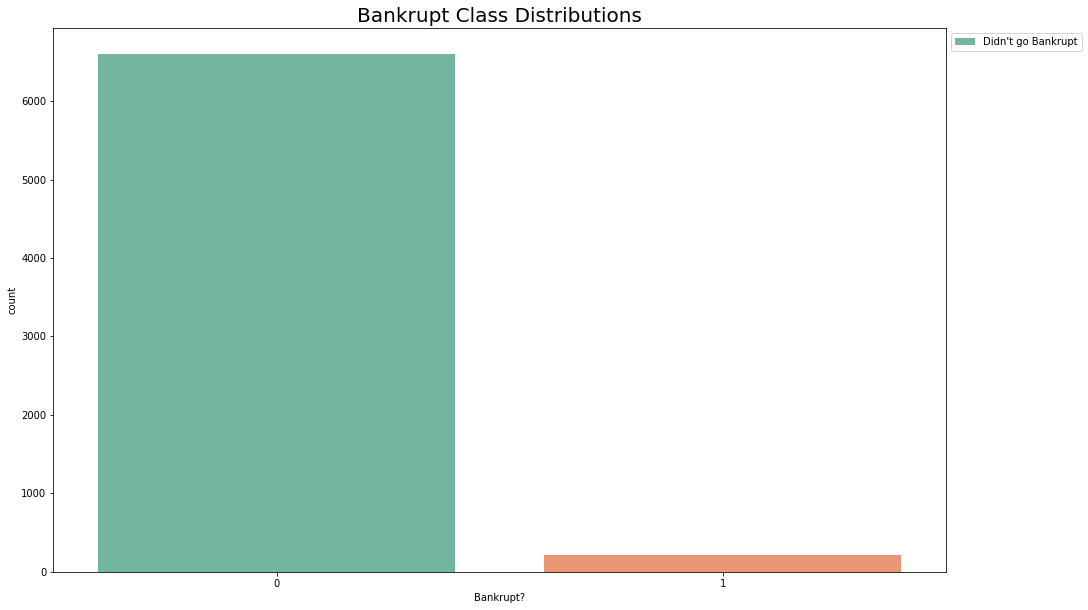

In [59]:
print(data['Bankrupt?'].value_counts())
plt.figure(figsize = (16,10))
sns.countplot('Bankrupt?',data=data, palette='Set2')
plt.legend(labels=["Didn't go Bankrupt", "Went Bankrupt"], loc = 2, bbox_to_anchor = (1,1))
plt.title('Bankrupt Class Distributions', fontsize=20)

The data classes in the output feature are not represented equally with a ratio of almost 30:1.

### Null Values

In [7]:
data.isnull().sum().sort_values(ascending=False)

 Equity to Liability                      0
 Quick Ratio                              0
 Operating Profit Growth Rate             0
 After-tax Net Profit Growth Rate         0
 Regular Net Profit Growth Rate           0
                                         ..
 Working Capital/Equity                   0
 Current Liabilities/Equity               0
 Long-term Liability to Current Assets    0
 Retained Earnings to Total Assets        0
Bankrupt?                                 0
Length: 95, dtype: int64

No null values

### Data type

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 95 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

### Check duplicates

In [9]:
data.duplicated().sum()

0

## Correlation Matrix

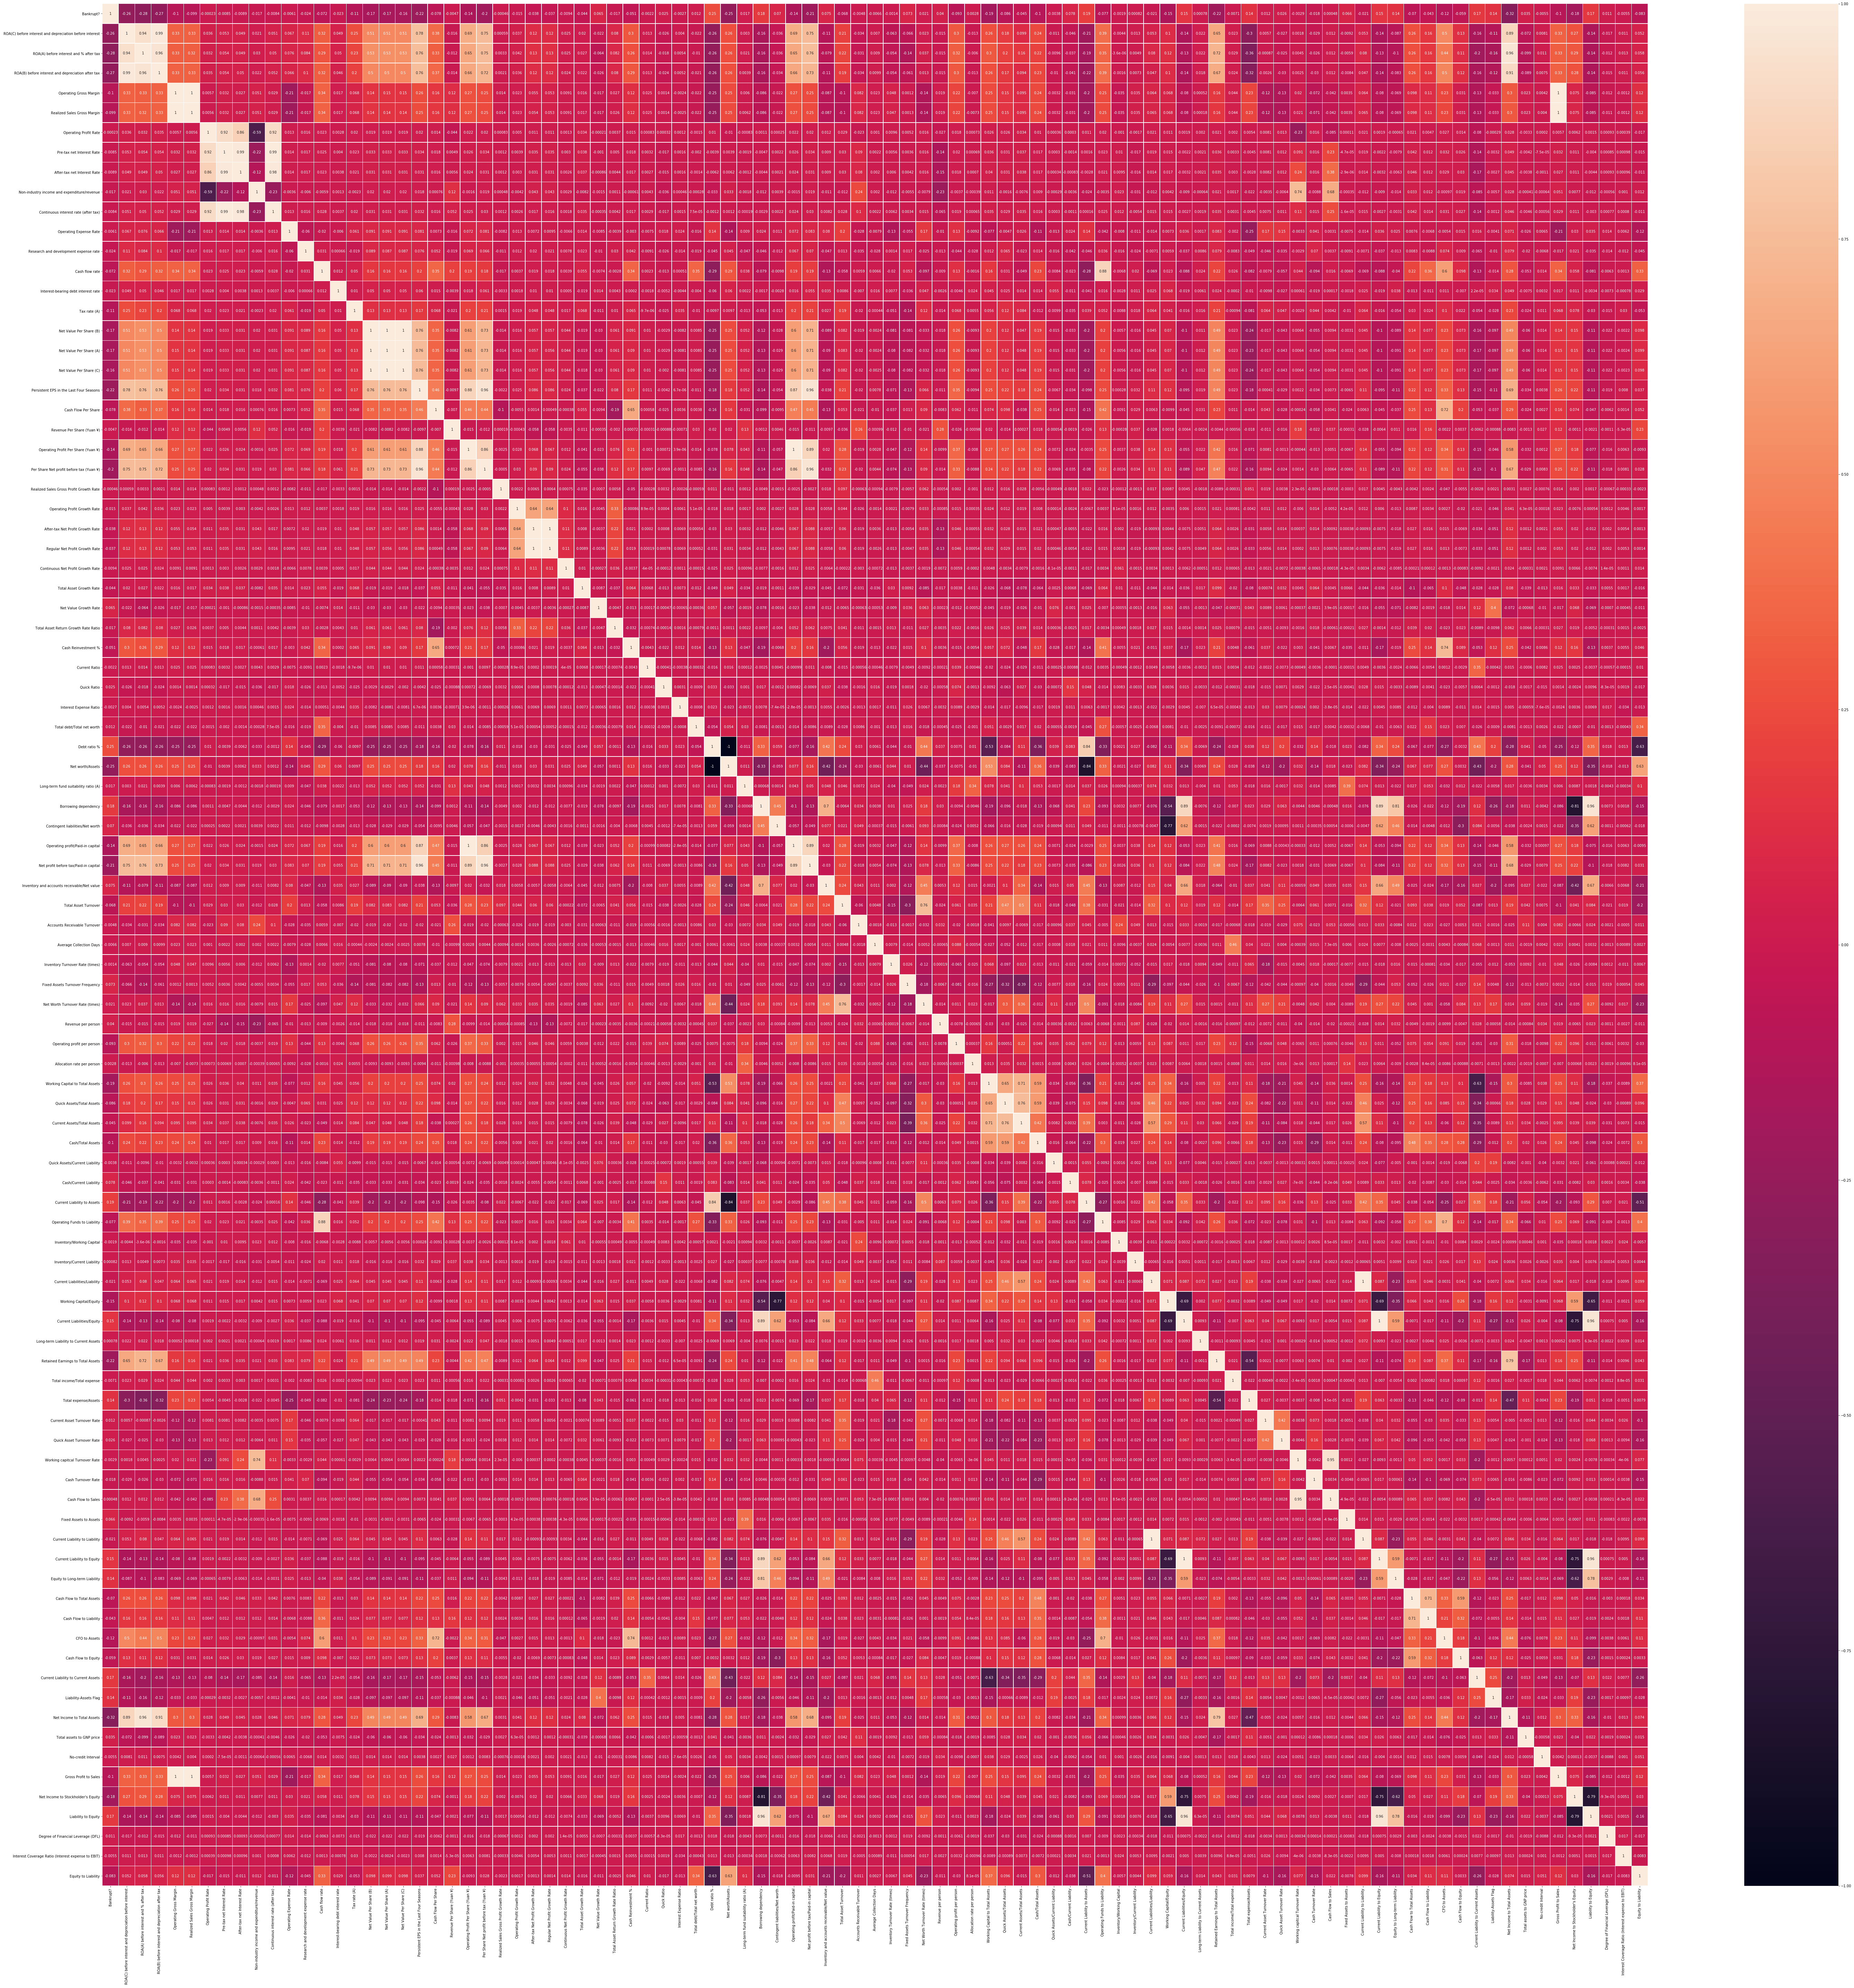

In [10]:
fig, ax = plt.subplots(figsize=(100,100))     
sns.heatmap(data.corr(), annot=True, linewidths=.5, ax=ax)

In [11]:
#upper_tri = data.corr().abs().where(np.triu(np.ones(data.corr().abs().shape),k=1).astype(np.bool))
#to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]   
#print(to_drop)

# My Data Modeling

In [61]:
#Split data into X Features and y labels
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

#Train-test split

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size = 0.8, test_size = 0.2, shuffle=True, random_state=1, stratify = y)

#SMOTE

sm = SMOTE(random_state = 42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)


#Scaling (Why ?)
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

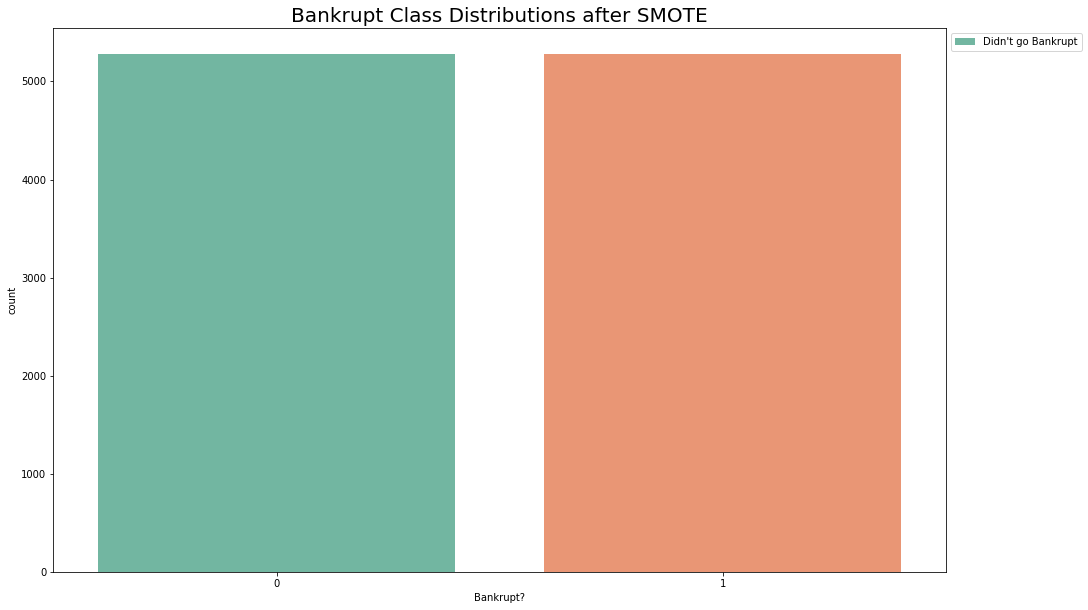

In [62]:
#sns.set_theme(context = 'talk', style='darkgrid', palette='deep', font='sans-serif', font_scale = 0.8, rc={"grid.linewidth": 4})

plt.figure(figsize = (16,10))
sns.countplot(y_train_sm, palette='Set2')
plt.legend(labels=["Didn't go Bankrupt", "Went Bankrupt"], loc = 2, bbox_to_anchor = (1,1))
plt.title('Bankrupt Class Distributions after SMOTE', fontsize=20)
plt.show()

In [158]:
#Logistic Regression
l_clf = LogisticRegression()
l_clf.fit(X_train_sm, y_train_sm)
y_test_pred = l_clf.predict(X_test)
print('\033[1m')
print('                     Logistic Regression :')
print('\033[0m')
print(classification_report(**{'y_true':y_test, 'y_pred':y_test_pred}))
print("Score :" ,l_clf.score(X_test, y_test) * 100)
#print(confusion_matrix(**{'y_true':y_test, 'y_pred':y_test_pred})) #Confusion matrix



#l_pred = l_clf.predict(X_test)
#l_score = l_clf.score(X_test, y_test)
#l_precision = precision_score(y_test, l_pred)
#l_recall = recall_score(y_test, l_pred)

#print ('GaussianNB accuracy:', l_score)
#print ('GaussianNB precision:', l_precision)
#print ('GaussianNB recall:', l_recall, '\n')
warnings.filterwarnings(action='ignore')



                     Logistic Regression :

              precision    recall  f1-score   support

           0       0.99      0.88      0.94      1320
           1       0.18      0.77      0.30        44

    accuracy                           0.88      1364
   macro avg       0.59      0.83      0.62      1364
weighted avg       0.97      0.88      0.91      1364

Score : 88.12316715542522


Text(0.5, 15.0, 'Predicted label')

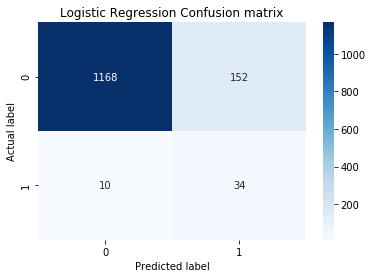

In [159]:
#Heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_test_pred)), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.title('Logistic Regression Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [160]:
#K-Nearest Neighbors
k_clf = KNeighborsClassifier()
k_clf.fit(X_train_sm, y_train_sm)
y_test_pred = k_clf.predict(X_test)
print('\033[1m')
print('                     K-Nearest Neighbors :')
print('\033[0m')
print(classification_report(**{'y_true':y_test, 'y_pred':y_test_pred}))
print("Score :" ,k_clf.score(X_test, y_test) * 100)



                     K-Nearest Neighbors :

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1320
           1       0.19      0.52      0.28        44

    accuracy                           0.91      1364
   macro avg       0.59      0.72      0.62      1364
weighted avg       0.96      0.91      0.93      1364

Score : 91.42228739002933


Text(0.5, 15.0, 'Predicted label')

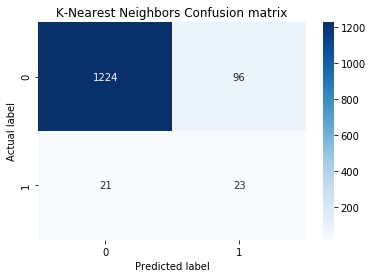

In [161]:
#Heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_test_pred)), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.title('K-Nearest Neighbors Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [162]:
#Decision Tree
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train_sm, y_train_sm)
y_test_pred = dt_clf.predict(X_test)
print('\033[1m')
print('                     Decision Tree :')
print('\033[0m')
print(classification_report(**{'y_true':y_test, 'y_pred':y_test_pred}))
print("Score :" ,dt_clf.score(X_test, y_test) * 100)


                     Decision Tree :

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1320
           1       0.21      0.48      0.29        44

    accuracy                           0.93      1364
   macro avg       0.60      0.71      0.63      1364
weighted avg       0.96      0.93      0.94      1364

Score : 92.52199413489735


Text(0.5, 15.0, 'Predicted label')

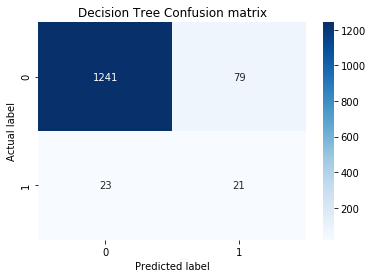

In [163]:
#Heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_test_pred)), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.title('Decision Tree Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [164]:
#Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_sm, y_train_sm)
y_test_pred = rf_clf.predict(X_test)
print('\033[1m')
print('                     Random Forest :')
print('\033[0m')
print(classification_report(**{'y_true':y_test, 'y_pred':y_test_pred}))
print("Score :" ,rf_clf.score(X_test, y_test) * 100)


                     Random Forest :

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1320
           1       0.49      0.48      0.48        44

    accuracy                           0.97      1364
   macro avg       0.74      0.73      0.73      1364
weighted avg       0.97      0.97      0.97      1364

Score : 96.7008797653959


Text(0.5, 15.0, 'Predicted label')

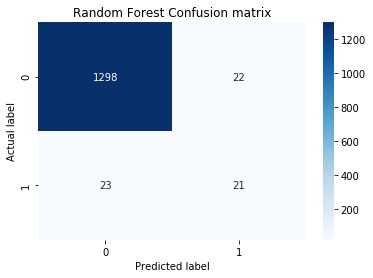

In [165]:
#Heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_test_pred)), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.title('Random Forest Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [166]:
#Support Vector Machine
svc_clf = SVC()
svc_clf.fit(X_train_sm, y_train_sm)
y_test_pred = svc_clf.predict(X_test)
print('\033[1m')
print('                     Support Vector Machine :')
print('\033[0m')
print(classification_report(**{'y_true':y_test, 'y_pred':y_test_pred}))
print("Score :" ,svc_clf.score(X_test, y_test) * 100)


                     Support Vector Machine :

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1320
           1       0.18      0.59      0.28        44

    accuracy                           0.90      1364
   macro avg       0.58      0.75      0.61      1364
weighted avg       0.96      0.90      0.92      1364

Score : 89.95601173020528


Text(0.5, 15.0, 'Predicted label')

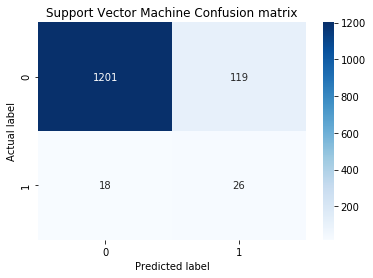

In [167]:
#Heatmap
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_test_pred)), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")

plt.title('Support Vector Machine Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# ROC Curves

In [145]:
# Instantiate the classfiers and make a list
classifiers = [LogisticRegression(), 
               KNeighborsClassifier(), 
               DecisionTreeClassifier(),
               RandomForestClassifier(),SVC(probability=True)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train_sm, y_train_sm)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

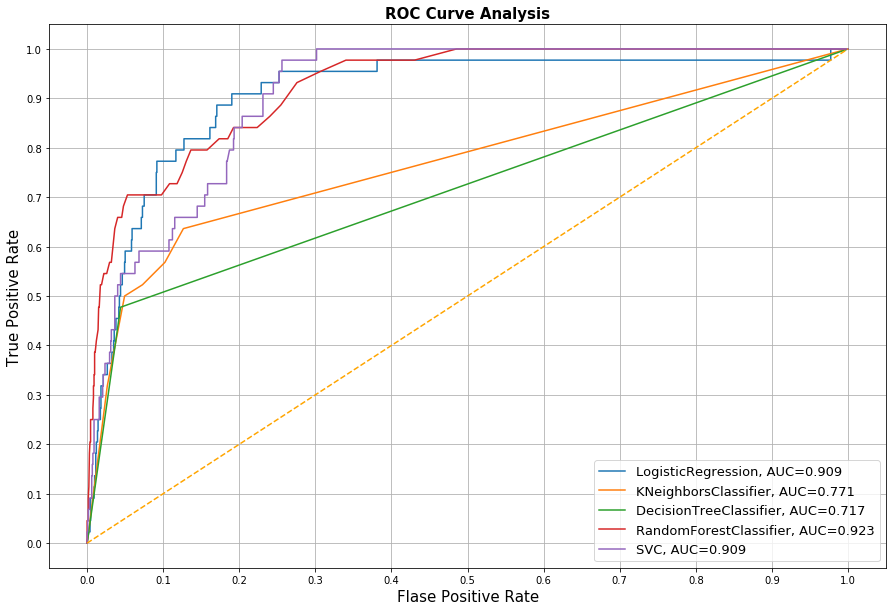

In [153]:
fig = plt.figure(figsize=(15,10))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')
plt.grid()
plt.show()

### Comparing Model Score

In [176]:
# Creating a dataframe to compare our models' performances:
predictive_model_scores = pd.DataFrame(data=[('Logistic Regression',88.12316715542522),
                                             ('Support Vector Machine',89.95601173020528),
                                             ('K-Nearest Neighbors',91.42228739002933),
                                             ('Decision Tree',92.52199413489735), 
                                             ('Random Forest',96.7008797653959)],
                                       columns=['model', 'training_score'])
predictive_model_scores

,model,training_score
0,Logistic Regression,88.123167
1,Support Vector Machine,89.956012
2,K-Nearest Neighbors,91.422287
3,Decision Tree,92.521994
4,Random Forest,96.700880


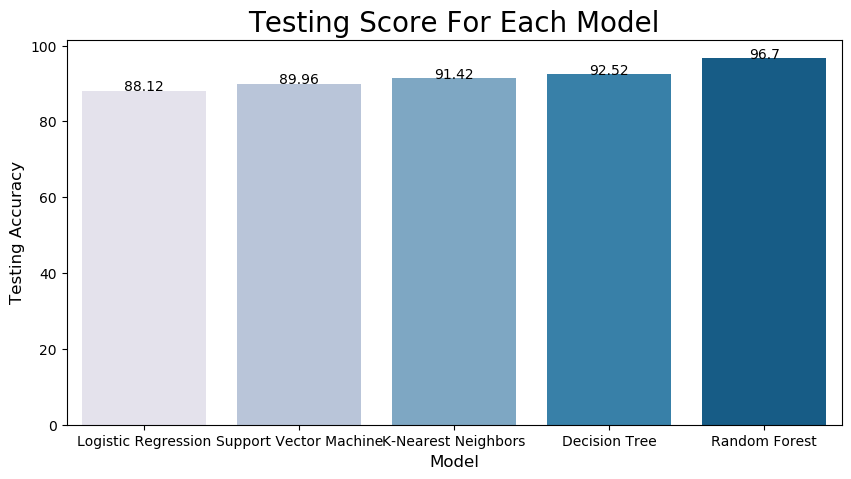

In [179]:
# Visualizing testing score of each model: 
plt.style.use('default')
plt.figure(figsize=(10,5))
p=sns.barplot(x='model', y='training_score', data=predictive_model_scores, palette='PuBu')
plt.title('Testing Score For Each Model', fontsize = 20)
plt.xlabel('Model', fontsize = 12)
plt.ylabel('Testing Accuracy', fontsize = 12)
for index, row in predictive_model_scores.iterrows():
    p.text(x=row.name, y=row.training_score, s=round(row.training_score,2), color='black', horizontalalignment='center');